In [11]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical

train = pd.read_csv('C:/Users/meeta/Desktop/TSWE2019/sign-language-recognition/dataset/sign_mnist_train.csv', header = 0)
test = pd.read_csv('C:/Users/meeta/Desktop/TSWE2019/sign-language-recognition/dataset/sign_mnist_test.csv', header = 0)

In [34]:
def getProcessedData(train, test):
    
    y_train = train['label'].values
    y_test = test['label'].values

    x_train = train.drop(['label'],axis=1)
    x_test = test.drop(['label'], axis=1)

    x_train = np.array(x_train.iloc[:,:])
    x_train = np.array([np.reshape(i, (28, 28)) for i in x_train])

    x_test = np.array(x_test.iloc[:,:])
    x_test = np.array([np.reshape(i, (28, 28)) for i in x_test])

    return normalize( x_train, x_test, y_train, y_test )

In [33]:
def normalize( x_train, x_test, y_train, y_test ):
    
    x_train = x_train/255
    x_test = x_test/255
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    return x_train, x_test, y_train, y_test

In [13]:
x_train, x_test, y_train, y_test = getProcessedData(train, test)

In [14]:
print('Training examples:',x_train.shape[0])
print('Test examples:',x_test.shape[0])
print('X_train shape"',x_train.shape)
print('y_train shape"',y_train.shape)
print('X_test shape"',x_test.shape)
print('y_test shape"',y_test.shape)

x_train = x_train.reshape((27455, 28, 28, 1))
x_test = x_test.reshape((7172, 28, 28, 1))

print(x_train.shape)
print(y_train.shape)

Training examples: 27455
Test examples: 7172
X_train shape" (27455, 28, 28)
y_train shape" (27455, 25)
X_test shape" (7172, 28, 28)
y_test shape" (7172, 25)
(27455, 28, 28, 1)
(27455, 25)


In [15]:
from sklearn.externals import joblib
classifier = joblib.load('saved_classifier.pkl')

In [16]:
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import pydot

In [17]:
def toAlphabet(num):
    return chr(num + 65)

In [18]:
import matplotlib.pyplot as plt
import cv2

In [30]:
def getLabel( position ):
    
    image = x_test[position]
    encodedLabel = y_test[position]
    label = list(encodedLabel).index(1)
    return label,image

Label: D
Test image:


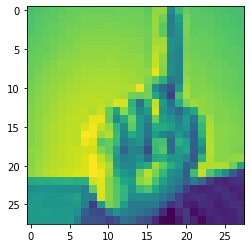

Prediction: D


In [36]:
pos = 8

label, image = getLabel( pos )

print('Label:', toAlphabet(label))

plt.imshow(image.reshape((28,28)))
print('Test image:')
plt.show()

image = image.reshape((1,28,28,1))
res = classifier.predict(image)
res = list(res[0])

mx = max(res)
print('Prediction:', toAlphabet(res.index(mx)))